## Machine learning models without hyperparamters tuning

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import  accuracy_score, recall_score, precision_score, f1_score, classification_report

In [126]:
df = pd.read_csv("../data/feature_selected.csv")
df = df.drop('Unnamed: 0', axis=1)

### Split the dataset into training (80%) and testing (20%) sets.

In [127]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [128]:
y.unique()
# We can see we can deal with it as labels

array([0., 1.])

### Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state=42, penalty='l1', solver='liblinear')
log.fit(X_train, y_train)

logistic_pre = log.predict(X_test)

train_acc = accuracy_score(y_train, log.predict(X_train))
test_acc = accuracy_score(y_test, logistic_pre)
print(f"Train accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")

Train accuracy: 0.822289156626506
Test accuracy: 0.8192771084337349


### Decision Tree

In [130]:
from sklearn.tree import DecisionTreeClassifier

dst = DecisionTreeClassifier(random_state=42)
dst.fit(X_train, y_train)

dst_pre = dst.predict(X_test)

train_acc = accuracy_score(y_train, dst.predict(X_train))
test_acc = accuracy_score(y_test, dst_pre)
print(f"Train accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")

Train accuracy: 1.0
Test accuracy: 0.7469879518072289


We can see that here we have overfitting

We can solve this by using cross validation

### Random Forest

In [131]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_pre = rf.predict(X_test)

train_acc = accuracy_score(y_train, rf.predict(X_train))
test_acc = accuracy_score(y_test, rf_pre)
print(f"Train accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")

Train accuracy: 1.0
Test accuracy: 0.8192771084337349


The results is more better than Decision tree but still have overfitting

### Support Vector Machine (SVM)

In [132]:
from sklearn.svm import SVC

svc = SVC(random_state=42, probability=True)
svc.fit(X_train, y_train)

svc_pre = svc.predict(X_test)

train_acc = accuracy_score(y_train, svc.predict(X_train))
test_acc = accuracy_score(y_test, svc_pre)
print(f"Train accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")

Train accuracy: 0.8704819277108434
Test accuracy: 0.8373493975903614


<Axes: xlabel='Model'>

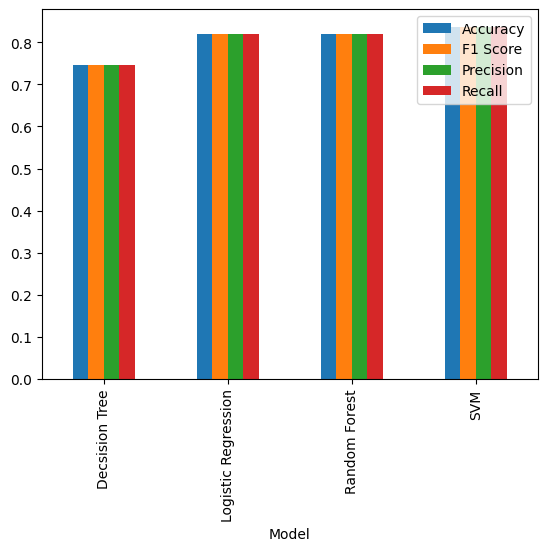

In [133]:
df2 = pd.DataFrame({
  'Model': ['Logistic Regression', 'Decsision Tree', 'Random Forest', 'SVM'],
  'Recall': [
    recall_score(y_test, logistic_pre, average='micro'), 
    recall_score(y_test, dst_pre, average='micro'),
    recall_score(y_test, rf_pre, average='micro'),
    recall_score(y_test, svc_pre, average='micro'),
    ],
  'Precision': [
    precision_score(y_test, logistic_pre, average='micro'), 
    precision_score(y_test, dst_pre, average='micro'),
    precision_score(y_test, rf_pre, average='micro'),
    precision_score(y_test, svc_pre, average='micro'),
    ],
  'F1 Score': [
    f1_score(y_test, logistic_pre, average='micro'), 
    f1_score(y_test, dst_pre, average='micro'),
    f1_score(y_test, rf_pre, average='micro'),
    f1_score(y_test, svc_pre, average='micro'),
    ],
  'Accuracy': [
    accuracy_score(y_test, logistic_pre), 
    accuracy_score(y_test, dst_pre),
    accuracy_score(y_test, rf_pre),
    accuracy_score(y_test, svc_pre),
    ],
})

pv = df2.pivot_table(index='Model')
pv.plot(kind='bar')

ROC Curve & AUC Score

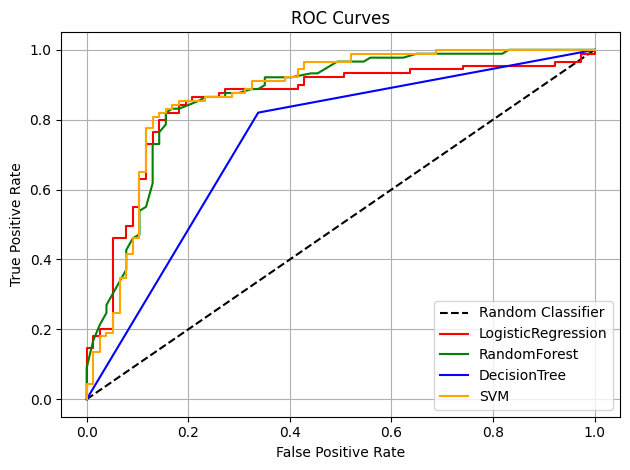

In [134]:
from sklearn.metrics import roc_curve, roc_auc_score


# put all models in list and loop
models = [log, rf, dst, svc]
titles = ["LogisticRegression", "RandomForest", "DecisionTree", "SVM"]
colors = ['red', 'green', 'blue', 'orange']
i = 0
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

for model in models:
  # predict probabilities for the positive class (1)
  y_probs = model.predict_proba(X_test)[:, 1]

  # ROC Curve
  fpr, tpr, thresholds = roc_curve(y_test, y_probs)
  auc_score = roc_auc_score(y_test, y_probs)

  plt.plot(fpr, tpr, label=f"{titles[i]}", color=colors[i])
  plt.grid(True)
  i += 1

plt.legend(loc="lower right")
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.tight_layout()
plt.show()